In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from scipy.optimize import curve_fit
from scipy.stats.distributions import  t
import seaborn as sns

In [2]:
p2 = pd.read_csv('Q3_second_part_data.csv')

In [3]:
df = p2[1:]
df = df.rename(columns={'Force(N)': 'f', "Voltage(mv)": "v_20d", "Unnamed: 2": "v_22d", "Unnamed: 3": "v_24d",
                        "Unnamed: 4": "v_28d", "Unnamed: 5": "v_30d", "Unnamed: 6": "v_32d", "Unnamed: 7": "v_34d",
                        "Unnamed: 8": "v_36d", "Unnamed: 9": "v_38d", "Unnamed: 10": "v_40d"})
df

,f,v_20d,v_22d,v_24d,v_28d,v_30d,v_32d,v_34d,v_36d,v_38d,v_40d
1,0.0,6.006905827,-2.423679253,-1.722799529,-6.933400103,4.402350146,5.127226165,-2.438079736,1.176198994,0.594977734,16.19796427
2,1.0,-3.106761297,3.539384952,3.135793254,-2.957198958,9.181497501,8.988834808,5.956020222,10.72079503,1.398080898,10.99186748
3,2.0,-2.461201398,7.46668575,8.063233487,3.908818507,9.376398329,10.85365658,6.878377871,6.5946179,9.000673466,9.885164868
4,3.0,2.610435387,3.308725995,13.58262318,4.24332935,3.220049265,3.353392541,11.62082585,16.10695551,20.59429028,22.64298299
5,4.0,0.222915629,3.810135577,-9.309103593,13.37303825,13.63587884,12.51947226,19.91945165,16.10564786,21.90660563,18.14079966
...,...,...,...,...,...,...,...,...,...,...,...
96,95.0,6.562904759,49.72346432,79.81869583,157.7428474,207.8793925,243.1154874,276.7808167,324.1662774,359.4739022,396.813557
97,96.0,9.007491572,43.21648247,87.47228247,165.6245551,208.6206138,236.790158,287.9101194,323.5151864,350.0001343,390.5850987
98,97.0,12.03388393,47.35557317,87.22951431,166.5920236,206.4196747,241.9564881,272.9193761,341.7868454,363.5262394,407.4387574
99,98.0,7.384459586,62.02480688,86.17742592,168.0524904,202.459576,243.3556196,292.8882799,330.8531526,369.5762804,403.1583333


In [4]:
cols = df.columns[1:]

def func(x, a, b):
        return a*x + b

_params = []
_params_cov = []
_a2 = []

for i in cols:
    _val = df[i].astype(float)
    
    # param, param_cov = curve_fit(func, _val, df["f"])
    param, param_cov = curve_fit(func, df["f"], _val)
    _params.append(param)
    _params_cov.append(param_cov)

for i in _params:
    _a2.append(i[0]) # a2 coefficient for each column in linear fit

_col_num = [20, 22, 24, 28, 30, 32, 34, 36, 38, 40]

# _col_num = _col_num[2:] # if we are not considering 20 and 22
# _a2 = _a2[2:]

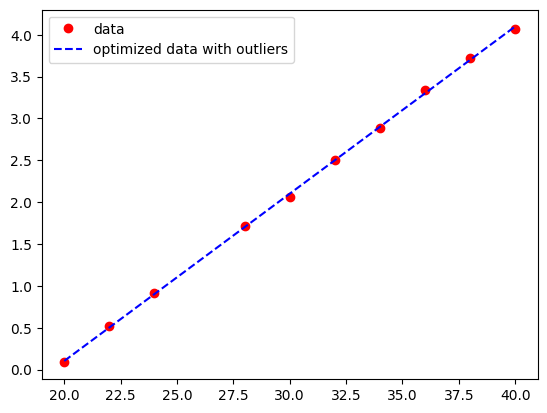

array([ 0.19982715, -3.89377181])

In [5]:
param_t, param_cov_t = curve_fit(func, _col_num, _a2)

_a2 = np.array(_a2)
_col_num = np.array(_col_num)
ans = param_t[0]*_col_num + param_t[1]

plt.plot(_col_num, _a2, 'o', color ='red', label ="data")
plt.plot(_col_num, ans, '--', color ='blue', label ="optimized data with outliers")
plt.legend()
plt.show()
param_t

In [11]:
_coeff33 = param_t[0]*33 + param_t[1]
_volt = 67.0
c1 = 3
_f = (_volt + c1)/_coeff33
print("The force is: ", _f)


The force is:  25.920893318868856


array([3.34050096, 1.12537046])

In [17]:
_voltage_values = [2.1, 10.5, 67.0, 34.3, 11.3, 88.9]

_force_33 = []
_force_39 = []

_c = _params[7][1]

for i in _voltage_values:
    """calculate for 33 degrees"""
    _tmp = param_t[0]*33 + param_t[1]
    _volt = i
    _f = (_volt - _c)/_tmp
    _force_33.append(_f)
    
    """calculate for 39 degrees"""
    _tmp = param_t[0]*39 + param_t[1]
    _volt = i
    _f = (_volt - _c)/_tmp
    _force_39.append(_f)
    
"""calculate deviation"""

_tmp = param_t[0]*36 + param_t[1]
_volt = 3
_f = _volt/_tmp
print(_f)
print(-_f)

0.9090893476364842
-0.9090893476364842


In [19]:
_force_39

[0.24993787773652817,
 2.4040673137746573,
 16.89315221093588,
 8.507434049216021,
 2.6092224981592413,
 22.509275383463862]

In [20]:
_force_33

[0.3609038318738258,
 3.4714110301380887,
 24.393274923225093,
 12.284514758553499,
 3.7676498109251617,
 32.50281154727121]

In [21]:
_c

1.1253704638806696